In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np

import os
os.chdir('..')
from DM import UNetDM
from train_DM import cosine_beta_schedule

In [2]:
def load_DM(model_path, input_channels, hidden_channels, num_layers, timesteps, device):
    model = UNetDM(input_channels, hidden_channels, num_layers, timesteps).to(device)
    model.load_state_dict(torch.load(model_path, map_location=device))
    model.eval()
    return model

In [3]:
def sample_images(model, num_samples, timesteps, device):
    betas = torch.tensor(cosine_beta_schedule(timesteps)).to(device)
    samples = model.sample_images(num_samples=num_samples, betas=betas, device=device)
    return samples

In [4]:
def visualize_images(images, nrow=5):
    from torchvision.utils import make_grid
    grid = make_grid(images, nrow=nrow, normalize=True)
    plt.figure(figsize=(10, 10))
    plt.imshow(grid.permute(1, 2, 0).numpy())
    plt.axis('off')
    plt.show()


In [5]:
DM_path = "DM_models/UNet_4layers_128hc_2000steps.pth"  # Path to the trained model
input_channels = 1
hidden_channels = 128
num_layers = 4
timesteps = 2000
num_samples = 25
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [6]:
model = load_DM(DM_path, input_channels, hidden_channels, num_layers, timesteps, device)

/tmp/ipykernel_514290/2581744475.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path, map_location=device))


In [15]:
samples = sample_images(model, num_samples, timesteps, device)
samples = torch.stack(samples)
samples = samples.reshape(-1, 1, 28, 28)

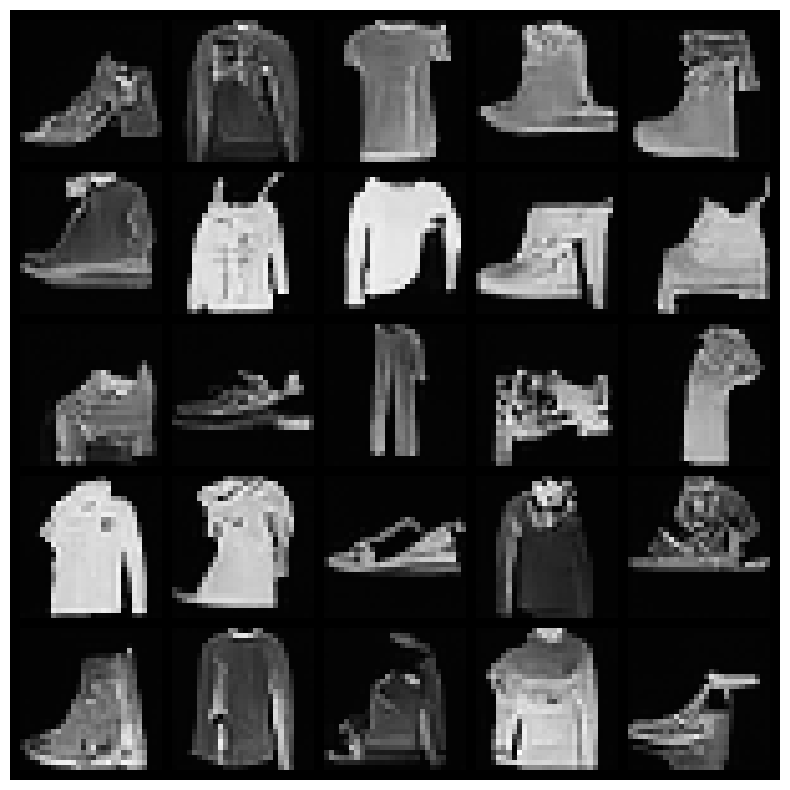

In [16]:
visualize_images(samples)